## 활성화 함수 (activation function)

### 계단 함수 (step function)

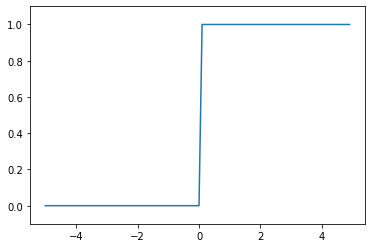

In [2]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    
    return np.array(x>0, dtype = np.int)
    
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 함수 (sigmoid function)

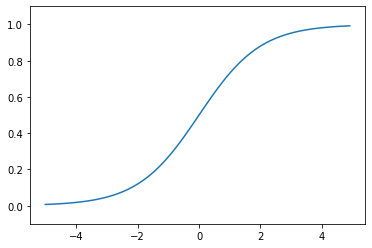

In [3]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### ReLU 함수 (Rectified Linear Unit function)

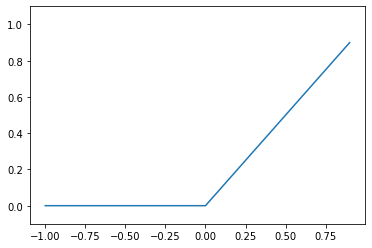

In [4]:
def relu(x):

  return np.maximum(0, x)

x = np.arange(-1.0, 1.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

## 다차원 배열의 계산

### 다차원 배열

In [5]:
import numpy as np

A = np.array([1, 2, 3, 4]) # 1차원 배열, 원소 4개로 구성

In [6]:
print(A)

[1 2 3 4]


In [7]:
np.ndim(A) # 배열의 차원 수

1

In [8]:
A.shape # 배열의 형상. 튜플을 반환

(4,)

In [9]:
A.shape[0] 

4

In [10]:
B = np.array([[1, 2], [3, 4], [5, 6]])

In [11]:
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [12]:
np.ndim(B)

2

In [13]:
B.shape

(3, 2)

### 행렬의 곱

In [14]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [15]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A.shape

(3, 2)

In [16]:
B = np.array([7, 8])
B.shape

(2,)

In [17]:
np.dot(A, B)

array([23, 53, 83])

## 3층 신경망 구현

### 각 층의 신호 전달 구현하기

In [18]:
# 입력층에서 1층으로의 신호 전달

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1 # 1층의 가중치 총합(가중 신호와 편향의 총합)

(2, 3)
(2,)
(3,)


In [19]:
Z1 = sigmoid(A1) # 활성화 함수로 변환된 신호

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [20]:
# 1층에서 2층으로의 신호 전달

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [22]:
# 2층에서 출력층으로의 신호 전달

def identity_function(x): # 항등 함수. 출력층의 활성화 함수로 이용.
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

### 구현 정리

In [25]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(X, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 출력층 설계

### 소프트맥스 함수 (softmax function)

In [26]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [27]:
sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

74.1221542101633


In [28]:
y = exp_a / sum_exp_a 
print(y)

[0.01821127 0.24519181 0.73659691]


In [29]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

오버플로 문제: softmax 함수는 지수 함수를 사용하기 때문에, 큰 값끼리 나눗셈을 하면 결과 수치가 불안정해진다. 

In [31]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

위와 같이 nan으로 출력된다.

In [32]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [34]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

입력 신호 중 최댓값을 빼주면 올바르게 계산할 수 있다. 분자와 분모 양쪽에 같은 값을 셈한 것이기 때문에 결과는 같다.

In [35]:
# 오버플로 문제를 개선하여 구현한 소프트맥스 함수

def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  
  return y

In [36]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0